In [1]:
import uqer
import datetime as dt
import pandas as pd
import numpy as np
import holidays
from uqer import DataAPI
client = uqer.Client(token='3258db0b3d9f68e5f490948c8fe0b85f95dace2667c3a1d533d96100f5ab878d')

d77a82643u@jin.com 账号登录成功


In [2]:
t=DataAPI.TradeCalGet(exchangeCD=u"XHKG",beginDate=u"20180101",endDate=u"20240715",isOpen=u"1",field=u"",pandas="1")

In [3]:
adjusted_dates=[]
t1=t.loc[t['isQuarterEnd']==1]
last_valid_date = None

for date_str in t1['calendarDate']:
    if last_valid_date is None:
        date = pd.Timestamp(date_str)
    else:
        date = last_valid_date

    c = DataAPI.HKSHSZHoldChgGet(secID=u"",ticker=u"",tradeDate=date,valueType=u"1",beginDate=u"",endDate=u"",exchangeCD=u"",field=u"secID,value,tradeCD,tradeDate",pandas="1")
    c1 = c.loc[c['tradeCD'] == '3']

    
        
    while c1.empty:
        date -= pd.Timedelta(days=1)
        c = DataAPI.HKSHSZHoldChgGet(secID=u"",ticker=u"",tradeDate=date,valueType=u"1",beginDate=u"",endDate=u"",exchangeCD=u"",field=u"secID,value,tradeCD,tradeDate",pandas="1")
        c1 = c.loc[c['tradeCD'] == '3']
    
    
    adjusted_dates.append(date.strftime('%Y%m%d'))


In [4]:

result=[]
for date in adjusted_dates:
    g=DataAPI.HKSHSZHoldChgGet(secID=u"",ticker=u"",tradeDate=date,valueType=u"1",beginDate=u"",endDate=u"",exchangeCD=u"",field=u"secID,value,tradeCD,tradeDate",pandas="1")
    daily_data=g.loc[g['tradeCD']=='3']
    top_50=daily_data.sort_values(by='value',ascending=False).head(50)
    weighted_value=sum(value/50 for value in top_50['value'])
    result.append({'date':date, 'weighted_ratio':weighted_value})

In [5]:
weighted_yield = []

for date in adjusted_dates:
    a = DataAPI.HKSHSZHoldChgGet(
        secID=u"",
        ticker=u"",
        tradeDate=date,
        valueType=u"1",
        beginDate=u"",
        endDate=u"",
        exchangeCD=u"",
        field=u"secID,value,tradeCD,tradeDate",
        pandas="1"
    )
    daily_data = a.loc[a['tradeCD'] == '3']
    top_50 = daily_data.sort_values(by='value', ascending=False).head(50)
    
    daily_yeild = 0  # 重置daily_yeild为0
    
    for stock in top_50.itertuples(index=False):
        s = DataAPI.MktHKEqudGet(
            secID=stock.secID,
            ticker=u"",
            tradeDate=date,
            beginDate=u"",
            endDate=u"",
            field=u"",
            pandas="1"
        )
        
        # 确保's' DataFrame不是空的，以避免潜在的KeyError
        if not s.empty:
            value_1 = (s['chg'] / s['preClosePrice']) * stock.value / 100
            daily_yeild += value_1
    
    # 添加每天的加权收益率到列表中
    weighted_yield.append({'date': date, 'weighted_yield': float(daily_yeild)})

In [6]:

df=pd.DataFrame(weighted_yield)
df


,date,weighted_yield
0,20180329,0.035623
1,20180629,0.383040
2,20180928,0.065402
3,20181231,0.154818
4,20190329,0.203122
5,20190628,0.060298
6,20190930,-0.063171
7,20191231,0.055898
8,20200331,0.261766
9,20200630,0.086221


In [7]:
import matplotlib.pyplot as plt

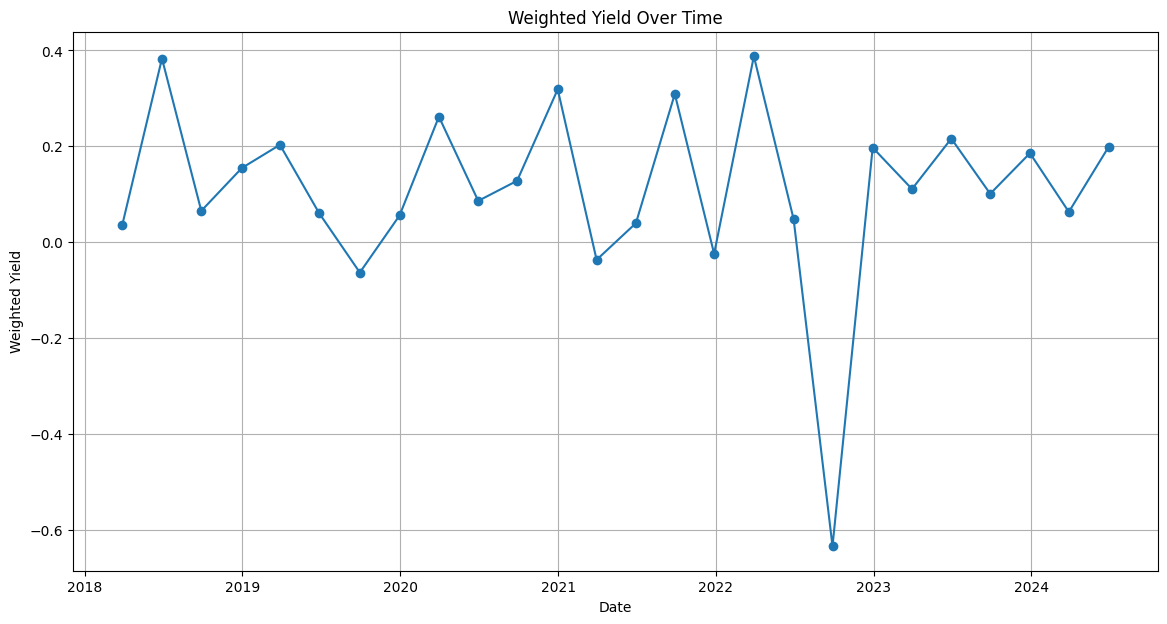

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

# 假设weighted_yeild是你的数据列表
df = pd.DataFrame(weighted_yield)

# 将'date'列转换为datetime类型
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# 设置'date'列为索引
df.set_index('date', inplace=True)

# 创建折线图
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df.index, df['weighted_yield'], marker='o')

# 设置图表标题和坐标轴标签
ax.set_title('Weighted Yield Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Weighted Yield')

# 自动设置日期刻度和格式
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.grid(True)

# 显示图表
plt.show()

In [9]:
DataAPI.HSIIdxmWeightGet(secID=u"HSI.ZIHK",ticker=u"",effDate=u"20220331",beginDate=u"",endDate=u"",field=u"",pandas="1")

,secID,ticker,secShortName,consID,consName,consTicker,effDate,consExchCD,weight
0,HSI.ZIHK,HSI,恒生指数,00001.XHKG,长和,00001,2022-03-31,XHKG,1.269535
1,HSI.ZIHK,HSI,恒生指数,00002.XHKG,中电控股,00002,2022-03-31,XHKG,1.267774
2,HSI.ZIHK,HSI,恒生指数,00003.XHKG,香港中华煤气,00003,2022-03-31,XHKG,0.872887
3,HSI.ZIHK,HSI,恒生指数,00005.XHKG,汇丰控股,00005,2022-03-31,XHKG,8.322449
4,HSI.ZIHK,HSI,恒生指数,00006.XHKG,电能实业,00006,2022-03-31,XHKG,0.581820
...,...,...,...,...,...,...,...,...,...
61,HSI.ZIHK,HSI,恒生指数,06862.XHKG,海底捞,06862,2022-03-31,XHKG,0.175845
62,HSI.ZIHK,HSI,恒生指数,09618.XHKG2,京东集团-SW,09618,2022-03-31,XHKG,1.715339
63,HSI.ZIHK,HSI,恒生指数,09633.XHKG2,农夫山泉,09633,2022-03-31,XHKG,0.690747
64,HSI.ZIHK,HSI,恒生指数,09988.XHKG,阿里巴巴-SW,09988,2022-03-31,XHKG,7.996523


In [10]:
#对比恒生指数
hsi_result=[]
hsi=DataAPI.MktIdxdGet(indexID=u"",ticker=u"HSI",tradeDate=u"20180329",beginDate=u"",endDate=u"",exchangeCD=u"",field=u"",pandas="1")
for date in adjusted_dates:
    hsi=DataAPI.MktIdxdGet(indexID=u"",ticker=u"HSI",tradeDate=date,beginDate=u"",endDate=u"",exchangeCD=u"",field=u"",pandas="1")
    hsi_yield=hsi['CHG']/hsi['preCloseIndex']
    hsi_result.append({'date':date, 'yield':float(hsi_yield)})
    



c:\Users\Liu Ailing\anaconda3\envs\name\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


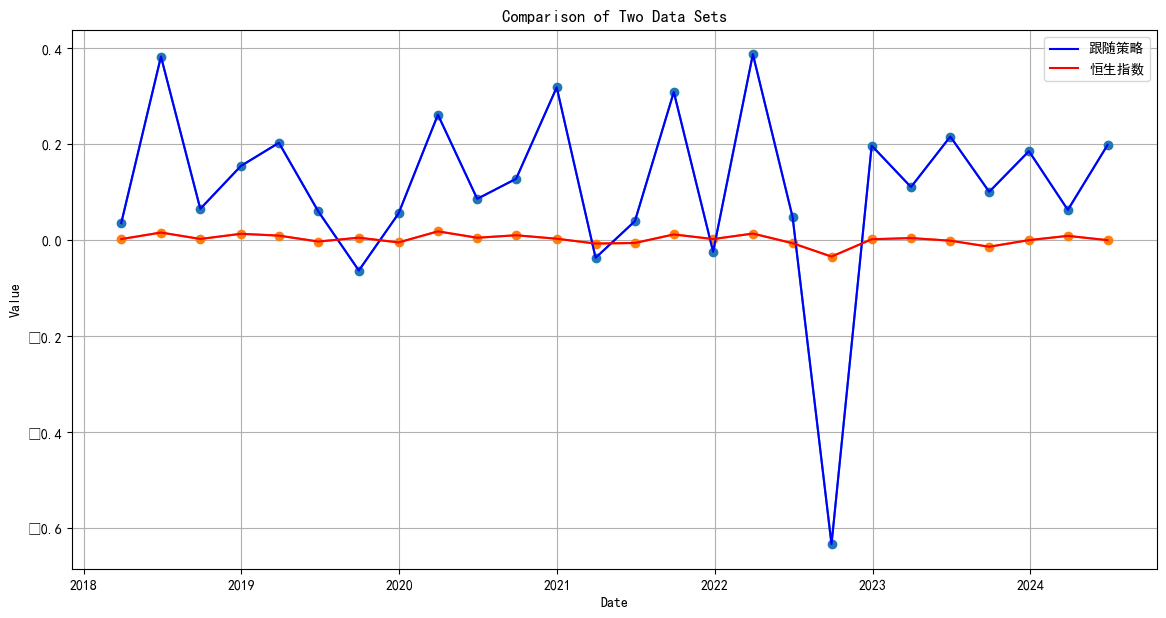

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'

df1=pd.DataFrame(weighted_yield)
df2=pd.DataFrame(hsi_result)

df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df1.index, df1['weighted_yield'], marker='o')
plt.plot(df2.index, df2['yield'], marker='o')

plt.plot(df1.index, df1['weighted_yield'], label='跟随策略', color='blue')

plt.plot(df2.index, df2['yield'], label='恒生指数', color='red')

plt.legend()
plt.title('Comparison of Two Data Sets')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.show()